In [1]:
import os

## bario hernandez data

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
# read ../datasets/af_clusters/2-repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId.tsv.gz
# add column names as repID, isDark, nMem, repLen, avgLen, repPlddt, avgPlddt, LCAtaxId
df_af_clusters = pd.read_csv('../datasets/af_clusters/2-repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId.tsv.gz', sep='\t')
df_af_clusters.columns = ['repID', 'isDark', 'nMem', 'repLen', 'avgLen', 'repPlddt', 'avgPlddt', 'LCAtaxId']

In [6]:
df_af_clusters.head()

,repID,isDark,nMem,repLen,avgLen,repPlddt,avgPlddt,LCAtaxId
0,A0A6M1CKG1,0,3,122,122.667,96.06,88.1467,91347
1,A0A4Q3Q6P1,1,3,117,113.333,71.94,67.8333,80864
2,A0A4V3EFQ4,0,3,153,156.000,68.56,58.8533,131567
3,A0A4V3EKB1,1,3,51,51.000,62.62,62.7700,1883
4,A0A4V3EP89,0,2,96,94.500,70.88,72.1900,2593676


In [7]:
len(df_af_clusters)

2302907

In [11]:
df_af_clusters['nMem'].value_counts().sort_index()

nMem
2        828029
3        381155
4        219479
5        144475
6        102921
          ...  
18430         1
23310         1
27625         1
35438         1
38901         1
Name: count, Length: 2299, dtype: int64

In [8]:
len(df_af_clusters)

2302907

In [9]:
df_af_clusters['repID'].nunique()

2302907

In [ ]:
list_to_download = df_af_clusters.sort_values(by='repPlddt', ascending=False)['repID'].tolist()

In [12]:
len(list_to_download)

2302907

In [2]:
import os
from tqdm import tqdm
import pandas as pd

In [9]:
# import file from ../datasets/pdb_chain_uniprot.tsv.gz
df_pdb_chain_uniprot = pd.read_csv('../datasets/pdb_chain_uniprot.tsv.gz', sep='\t', header=1)

/tmp/ipykernel_1059331/826708966.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pdb_chain_uniprot = pd.read_csv('../datasets/pdb_chain_uniprot.tsv.gz', sep='\t', header=1)


In [10]:
df_pdb_chain_uniprot

,PDB,CHAIN,SP_PRIMARY,RES_BEG,RES_END,PDB_BEG,PDB_END,SP_BEG,SP_END
0,101m,A,P02185,1,154,0,153,1,154
1,102l,A,P00720,1,40,1,40,1,40
2,102l,A,P00720,42,165,41,NaN,41,164
3,102m,A,P02185,1,154,0,153,1,154
4,103l,A,P00720,1,40,1,NaN,1,40
...,...,...,...,...,...,...,...,...,...
903941,9xia,A,P24300,1,388,1,NaN,1,388
903942,9xim,A,P12851,1,393,NaN,394,2,394
903943,9xim,B,P12851,1,393,NaN,394,2,394
903944,9xim,C,P12851,1,393,NaN,394,2,394


In [11]:
df_pdb_chain_uniprot['PDB'].nunique()

223977

In [12]:
import json

file_path = '../datasets/cath-4.2/chain_set_splits.json'

with open(file_path, 'r') as file:
    data = json.load(file)


In [ ]:
# combine the train and validation sets
test_data = data['test']
val_data = data['validation']
combined_data = test_data + val_data

In [26]:
list_uniprot = []
list_pdb_missing = []
dict_pdb_uniprot = {}
for entry in tqdm(combined_data):
    pdb_id = entry.split('.')[0]
    if pdb_id not in df_pdb_chain_uniprot['PDB'].values:
        list_pdb_missing.append(pdb_id) 
        dict_pdb_uniprot[pdb_id] = None
    
    else:
        uniprot_id = df_pdb_chain_uniprot[df_pdb_chain_uniprot['PDB'] == pdb_id]['SP_PRIMARY'].values[0]
        list_uniprot.append(uniprot_id)
        dict_pdb_uniprot[pdb_id] = uniprot_id


100%|██████████| 1728/1728 [01:34<00:00, 18.38it/s]


In [27]:
# save the dictionary to a file
with open('../datasets/test_val_pdb_uniprot_mapping.json', 'w') as f:
    json.dump(dict_pdb_uniprot, f, indent=4)

In [19]:
len(list_uniprot), len(list_pdb_missing)

(1668, 60)

In [20]:
list_pdb_missing

['2lkl',
 '4pav',
 '3fkm',
 '3e5d',
 '4w4k',
 '3vb0',
 '3f40',
 '4orl',
 '3f9s',
 '4myb',
 '2rk0',
 '2w8x',
 '5h9c',
 '2r4i',
 '3hcz',
 '3f14',
 '2nbs',
 '1sp8',
 '4r80',
 '3vjf',
 '3iv4',
 '1g6u',
 '2rgq',
 '2ppt',
 '2ml5',
 '4l3u',
 '4n6t',
 '2vsh',
 '2jua',
 '4jd0',
 '4ayl',
 '1y66',
 '2pa4',
 '2rk9',
 '1uw1',
 '3odh',
 '2ope',
 '2g5x',
 '5j7d',
 '4hbr',
 '2amh',
 '1xg8',
 '4evw',
 '1tsj',
 '2j6d',
 '5aig',
 '2p0x',
 '2pxg',
 '2ou3',
 '4n1v',
 '4czn',
 '3rlb',
 '4hyn',
 '2kxt',
 '4px7',
 '3wsf',
 '3wsf',
 '4fzq',
 '3nkh',
 '1gu9']

In [24]:
test_missing = []
val_missing = []
for entry in tqdm(test_data):
    pdb_id = entry.split('.')[0]
    if pdb_id in list_pdb_missing:
        test_missing.append(pdb_id)
for entry in tqdm(val_data):
    pdb_id = entry.split('.')[0]
    if pdb_id in list_pdb_missing:
        val_missing.append(pdb_id)

100%|██████████| 608/608 [00:00<00:00, 963770.53it/s]


In [25]:
len(test_missing), len(val_missing)

(48, 12)

# getting the clusters that match the existing pdbs

In [2]:
import pandas as pd
import json

In [3]:
from tqdm import tqdm

In [4]:
# load the dictionary from the file
with open('../datasets/af_clusters/afdb_clusters_repid_for_test_and_val.json', 'r') as f:
    dict_pdb_uniprot = json.load(f)

## filtering the similar clusters

In [33]:
# read teh file ../datasets/af_clusters/6-all-vs-all-similarity-queryId_targetId_eValue.tsv.gz
df_af_similarity = pd.read_csv('../datasets/af_clusters/6-all-vs-all-similarity-queryId_targetId_eValue-Dec16_2024.tsv.gz', sep='\t', compression='gzip', header=0)
df_af_similarity.columns = ['queryId', 'targetId', 'eValue']

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_af_similarity.head()

,queryId,targetId,eValue
0,S4YGI1,A0A017T8V7,1.886000e-13
1,S4YGI1,A0A1M3NHW0,3.298000e-07
2,S4YGI1,A0A857JKL2,1.318000e-02
3,S4YGI1,A0A136PAL6,4.846000e-01
4,S4YGI1,A0A2L0TZA6,3.424000e-01


In [ ]:
# get the stats on eValue colun like mean min, max, std, median
eValue_stats = df_af_similarity['eValue'].describe()
eValue_stats

count    6.001958e+08
mean     2.428234e+00
std      2.924090e+00
min      0.000000e+00
25%      1.907000e-02
50%      9.991000e-01
75%      4.283000e+00
max      1.000000e+01
Name: eValue, dtype: float64

In [ ]:
df_af_similarity[df_af_similarity['targetId'] == 'A0A017N0L6']

,queryId,targetId,eValue


In [39]:
# get a list of all the 'cluster_repID's in the df_af_similarity dataframe
list_cluster_repID = []
for value in dict_pdb_uniprot.values():
    if value is None:
        continue
    else:
        list_cluster_repID.append(value['cluster_repID'])

In [40]:
list_cluster_repID

['A0A017N0L6',
 'B2RRD7',
 'P57765',
 'Q9PDE3',
 'A0A5R9G6I7',
 'O05205',
 'P04147',
 'P00947',
 'A0A2S8LJR3',
 'A0A671NMI7',
 'Q32GQ1',
 'A0A448TVG9',
 'P25604',
 'A0A6V8RM76',
 'J3A1Q5',
 'Q387B5',
 'A0A7C2ZIX2',
 'A0A3B9IXF3',
 'A0A828U496',
 'A0A662NG28',
 'A0A832M199',
 'Q8BSQ9',
 'H2AN82',
 'A0A6A1Q0B4',
 'A0A7Z9E676',
 'A0A5R9GAG4',
 'Q5REY7',
 'A0A0U3JGD8',
 'A0A7H8WQT6',
 'A0A1D3L079',
 'A0A3L6Q4H0',
 'A0A429FN71',
 'A0A6M1UC54',
 'A0A0F4R1Q5',
 'B2WSG4',
 'P11861',
 'A0A811ZQJ4',
 'O94687',
 'A0A830G2A8',
 'Q9UYX8',
 'A0A807UW18',
 'A0A2N1CWD2',
 'J0T1X6',
 'A0A0P1KLT2',
 'A0A662N7A2',
 'A0A7W4GD33',
 'Q5SHR6',
 'S9PXK2',
 'E0CX04',
 'A0A251SC53',
 'O43396',
 'A0A2K5FA67',
 'A0A7H0P0X1',
 'J0K0E6',
 'P50024',
 'P65689',
 'P00974',
 'P57763',
 'A0A804KI40',
 'F2NNU6',
 'P84853',
 'A6MTM7',
 'A0A381M518',
 'Q382K8',
 'Q9PRA0',
 'F8AH55',
 'P27560',
 'F4MWK4',
 'A0A6L3ZHG1',
 'P98170',
 'P0AC81',
 'P27560',
 'A0A0E3HA43',
 'A0A6P8IE83',
 'Q8ZIK1',
 'A0A7Z8WBS4',
 'Q9YED4',
 'Q9K

In [ ]:
# in df_af_similarity, remove all the rows where queryId or targetId is not in list_cluster_repID
df_af_similarity_relevant = df_af_similarity[df_af_similarity['queryId'].isin(list_cluster_repID) | df_af_similarity['targetId'].isin(list_cluster_repID)]

In [ ]:
del df_af_similarity

In [ ]:
df_af_similarity_relevant.to_csv('../datasets/af_clusters/6-all-vs-all-similarity-queryId_targetId_eValue-relevantOnly.tsv.gz', sep='\t', compression='gzip', index=False)

In [34]:
# read the file ../datasets/af_clusters/6-all-vs-all-similarity-queryId_targetId_eValue-relevantOnly.tsv.gz into df_af_similarity_relevant
df_af_similarity_relevant = pd.read_csv('../datasets/af_clusters/6-all-vs-all-similarity-queryId_targetId_eValue-relevantOnly.tsv.gz', sep='\t', compression='gzip', header=0)


In [35]:
df_af_similarity_relevant

,queryId,targetId,eValue
0,A0A2R4BRD4,A0A146I2Y9,1.281000e+00
1,A0A0B1PQF1,F1QCA7,4.913000e-09
2,V6DHK6,Q6W2J9,1.844000e-03
3,A0A0L0C4X2,G1S4D2,2.178000e-02
4,A0A7Y4WMX1,A0A0A6MWX6,3.202000e+00
...,...,...,...
20546,A0A3E0MZC2,Q19853,4.873000e-03
20547,J9KV35,Q8I240,2.320000e+00
20548,A0A4R9G4P0,A0A7C0UQX1,2.070000e-05
20549,A0A2R5GDU2,A0A7C0UQX1,7.368000e-04


In [36]:
df_af_similarity_relevant_highsim = df_af_similarity_relevant[df_af_similarity_relevant['eValue'] < 1e-1]

In [37]:
df_af_similarity_relevant_highsim

,queryId,targetId,eValue
1,A0A0B1PQF1,F1QCA7,4.913000e-09
2,V6DHK6,Q6W2J9,1.844000e-03
3,A0A0L0C4X2,G1S4D2,2.178000e-02
5,A2DSC1,Q6W2J9,8.707000e-03
7,A0A7S4M312,G1S4D2,3.547000e-04
...,...,...,...
20543,A0A6M1LXT0,Q19853,4.896000e-05
20546,A0A3E0MZC2,Q19853,4.873000e-03
20548,A0A4R9G4P0,A0A7C0UQX1,2.070000e-05
20549,A0A2R5GDU2,A0A7C0UQX1,7.368000e-04


In [41]:
set_query = set(df_af_similarity_relevant_highsim['queryId'].unique())
set_target = set(df_af_similarity_relevant_highsim['targetId'].unique())    
set_other = set(list_cluster_repID)
combined_clusters_to_avoid = set_query.union(set_target).union(set_other)

In [42]:
len(combined_clusters_to_avoid)

8190

In [43]:
# write the set to a file
with open('../datasets/af_clusters/combined_clusters_to_avoid.txt', 'w') as f:
    for item in combined_clusters_to_avoid:
        f.write(f"{item}\n")

## get the remaining clusters

In [9]:
import pandas as pd
import numpy as np

In [6]:
df_af_clusters = pd.read_csv('../datasets/af_clusters/2-repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId.tsv.gz', sep='\t')
df_af_clusters.columns = ['repID', 'isDark', 'nMem', 'repLen', 'avgLen', 'repPlddt', 'avgPlddt', 'LCAtaxId']

In [4]:
df_af_clusters

,repID,isDark,nMem,repLen,avgLen,repPlddt,avgPlddt,LCAtaxId
0,A0A6M1CKG1,0,3,122,122.667,96.06,88.1467,91347
1,A0A4Q3Q6P1,1,3,117,113.333,71.94,67.8333,80864
2,A0A4V3EFQ4,0,3,153,156.000,68.56,58.8533,131567
3,A0A4V3EKB1,1,3,51,51.000,62.62,62.7700,1883
4,A0A4V3EP89,0,2,96,94.500,70.88,72.1900,2593676
...,...,...,...,...,...,...,...,...
2302902,A0A1R0YDI6,0,7,116,114.571,89.56,84.3671,2
2302903,A0A1R0ZP04,0,7,153,162.143,84.19,81.7857,2
2302904,A0A1R0ZSC6,1,2,175,182.000,55.41,54.8950,44249
2302905,A0A2N6DJD9,0,2,470,453.000,89.75,87.3150,2


In [11]:
np.mean(df_af_clusters['avgPlddt']), np.median(df_af_clusters['avgPlddt'])

(np.float64(71.64122144272434), np.float64(74.03))

In [ ]:
# get statistics on df_af_clusters['avgPlddt']

In [16]:
df_af_clusters['repPlddt'].describe()

count    2.302907e+06
mean     7.114110e+01
std      1.575063e+01
min      2.100000e+01
25%      6.034000e+01
50%      7.350000e+01
75%      8.388000e+01
max      9.875000e+01
Name: repPlddt, dtype: float64

In [15]:
# Get descriptive statistics for the 'avgPlddt' column
df_af_clusters['avgPlddt'].describe()

count    2.302907e+06
mean     7.164122e+01
std      1.440989e+01
min      2.415000e+01
25%      6.182500e+01
50%      7.403000e+01
75%      8.315000e+01
max      9.850000e+01
Name: avgPlddt, dtype: float64

In [19]:
threshold = 70
df_af_clusters_thresholded = df_af_clusters[(df_af_clusters['repPlddt'] > threshold) & (df_af_clusters['avgPlddt'] > threshold)]


In [20]:
df_af_clusters_thresholded['nMem'].sum()

np.int64(22250221)

In [14]:
df_af_clusters['nMem'].sum()

np.int64(30045243)

In [22]:
with open('../datasets/af_clusters/combined_clusters_to_avoid.txt', 'r') as f:
    combined_clusters_to_avoid = set(f.read().splitlines())

In [23]:
# keep rows where repID is not in combined_clusters_to_avoid
df_af_clusters_usable = df_af_clusters[~df_af_clusters['repID'].isin(combined_clusters_to_avoid)]
df_af_clusters_usable_thresholded = df_af_clusters_thresholded[~df_af_clusters['repID'].isin(combined_clusters_to_avoid)]

/tmp/ipykernel_1775403/3755066444.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_af_clusters_usable_thresholded = df_af_clusters_thresholded[~df_af_clusters['repID'].isin(combined_clusters_to_avoid)]


In [24]:
df_af_clusters_usable_thresholded

,repID,isDark,nMem,repLen,avgLen,repPlddt,avgPlddt,LCAtaxId
0,A0A6M1CKG1,0,3,122,122.667,96.06,88.1467,91347
4,A0A4V3EP89,0,2,96,94.500,70.88,72.1900,2593676
5,A0A4V3FPA2,1,7,255,260.286,81.44,78.0186,1224
6,A0A523ZMB3,0,6,177,173.833,86.06,86.5400,2
7,A0A563CS38,1,2,200,200.000,75.31,76.4650,2905966
...,...,...,...,...,...,...,...,...
2302895,A0A1G0ICN5,0,8,222,233.500,88.62,84.7975,2
2302901,A0A1R0Y4W7,0,4,150,157.750,85.00,85.8425,1239
2302902,A0A1R0YDI6,0,7,116,114.571,89.56,84.3671,2
2302903,A0A1R0ZP04,0,7,153,162.143,84.19,81.7857,2


In [ ]:
df_af_clusters_usable.to_csv('../datasets/af_clusters/df_af_clusters_usable.tsv.gz', sep='\t', compression='gzip', index=False)

In [26]:
df_af_clusters_usable_thresholded.to_csv('../datasets/af_clusters/df_af_clusters_usable_threshold70.tsv.gz', sep='\t', compression='gzip', index=False)

# creating dataloader ready files

In [27]:
import pandas as pd
import numpy as np

In [28]:
from tqdm import tqdm

In [29]:
# load the usable clusters
df_af_clusters_usable = pd.read_csv('../datasets/af_clusters/df_af_clusters_usable.tsv.gz', sep='\t')

In [30]:
# load the usable clusters
df_af_clusters_usable_thresholded = pd.read_csv('../datasets/af_clusters/df_af_clusters_usable_threshold70.tsv.gz', sep='\t')

## do it for non thresholded

In [6]:
repIDs = df_af_clusters_usable["repID"].tolist()
rep2cluster = {rep: idx for idx, rep in enumerate(repIDs)}
num_clusters = len(repIDs)

In [75]:
len(set(rep2cluster.keys()))

2298629

In [12]:

import gzip
file_path_big = "../datasets/af_clusters/7-AFDB50-repId_memId.tsv.gz"

with gzip.open(file_path_big, "rt") as f:
    header = f.readline().strip().split("\t")
print(header)


['A0A5C6TQW4', 'A0A2U0VG77']


In [ ]:
len(rep2cluster)

2298629

In [ ]:
# 2) Prepare your counters and list
cluster_sizes = np.zeros(num_clusters, dtype=np.int64)
member_list   = []

# 3) Read in chunks, telling pandas the column names
col_names = ["repId", "memId"]
chunksize = 5_000_000

for chunk in tqdm(pd.read_csv(
        file_path,
        sep="\t",
        header=None,           # no header in file
        names=col_names,       # assign these names
        usecols=["repId","memId"],
        dtype={"repId": str, "memId": str},
        compression="gzip",
        chunksize=chunksize,
    )):
    # 4) Filter to only the repIDs you care about
    chunk = chunk[chunk["repId"].isin(rep2cluster)]
    # 5) Tally sizes & collect members
    for rep, mem in zip(chunk["repId"], chunk["memId"]):
        cid = rep2cluster[rep]
        cluster_sizes[cid] += 1
        member_list.append(mem)

# 6) Build the final NumPy arrays
cluster_offsets = np.concatenate([[0], cluster_sizes.cumsum()[:-1]])
flat_members    = np.array(member_list, dtype="<U64")

# 7) Save to disk for ultra-fast reload later
np.save("cluster_sizes.npy",   cluster_sizes)
np.save("cluster_offsets.npy", cluster_offsets)
np.save("flat_members.npy",    flat_members)


0it [00:00, ?it/s]

43it [02:14,  3.14s/it]


In [82]:
chunk['repId']

210000154    A0A0B0DZL3
210000185        Q7SBH0
210000186        Q7SBH0
210000198    A0A699JX98
210000199    A0A699JXH1
                ...    
214683047    A0A7T9ESF2
214683190    A0A2S7KNA8
214683402    A0A2V7FCX3
214684174    A0A117LLV0
214684233    A0A177N8Z7
Name: repId, Length: 109277, dtype: object

In [69]:
len(flat_members)

5195368

In [16]:
# 7) Save to disk for ultra-fast reload later
np.save("../datasets/af_clusters/cluster_sizes.npy",   cluster_sizes)
np.save("../datasets/af_clusters/cluster_offsets.npy", cluster_offsets)
np.save("../datasets/af_clusters/flat_members.npy",    flat_members)

In [ ]:
len(cluster_sizes), len(cluster_offsets), len(flat_members)

(2298629, 2298629, 5195368)

In [81]:
np.sum(cluster_sizes)

np.int64(5195368)

In [59]:
import matplotlib.pyplot as plt

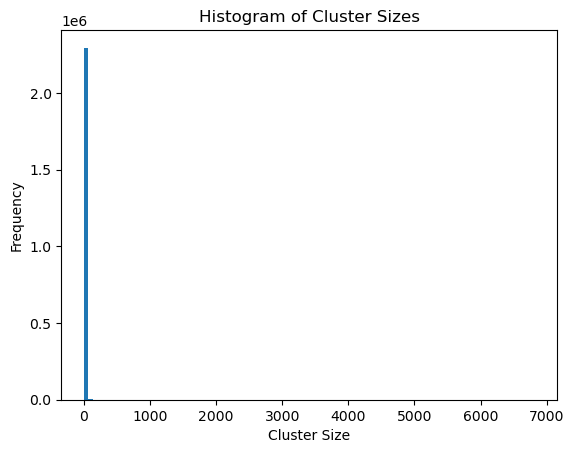

In [60]:
# get a histogram of cluster sizes
plt.hist(cluster_sizes, bins=100)
plt.xlabel("Cluster Size")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster Sizes")
plt.show()

In [74]:
# check the number of clusters with size 1
np.sum(cluster_sizes > 0)

np.int64(2298629)

### size sanity check

In [44]:
# load combined_clusters_to_avoid from the file
with open('../datasets/af_clusters/combined_clusters_to_avoid.txt', 'r') as f:
    combined_clusters_to_avoid_loaded = set(f.read().splitlines())  

In [48]:
len(combined_clusters_to_avoid_loaded)

8190

In [45]:
df_af_clusters = pd.read_csv('../datasets/af_clusters/2-repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId.tsv.gz', sep='\t')
df_af_clusters.columns = ['repID', 'isDark', 'nMem', 'repLen', 'avgLen', 'repPlddt', 'avgPlddt', 'LCAtaxId']

In [46]:
df_af_clusters_avoid= df_af_clusters[df_af_clusters['repID'].isin(combined_clusters_to_avoid_loaded)]

In [49]:
df_af_clusters_avoid

,repID,isDark,nMem,repLen,avgLen,repPlddt,avgPlddt,LCAtaxId
711,A0A0B7NGB7,0,59,894,855.915,72.75,79.4061,131567
811,A0A0G4H5R2,0,3,710,719.667,54.81,63.5900,131567
878,A0A840TJ42,0,9,158,165.222,76.44,74.5356,2
1102,A0A6A4SDS9,0,33,764,738.121,69.94,69.4997,6072
1194,A0A0D2M9T4,0,4,463,442.000,54.25,54.9625,2759
...,...,...,...,...,...,...,...,...
2300820,A0A813G2Y3,0,9,362,350.222,71.88,67.6144,131567
2301612,A0A2V3J2F9,0,12,126,128.083,73.62,68.3092,2759
2302000,A0A520VHL1,0,70,219,238.043,85.62,92.4789,131567
2302446,A0A0Q5BKI9,0,11,509,485.909,70.56,73.1845,131567


In [50]:
# get the sum of nMem column
sum_nMem = df_af_clusters_avoid['nMem'].sum()
sum_nMem

np.int64(147409)

In [87]:
df_af_clusters['nMem'].sum()

np.int64(30045243)

In [84]:
df_af_clusters_keep= df_af_clusters[df_af_clusters['repID'].isin(rep2cluster.keys())]
df_af_clusters_keep['nMem'].sum()

np.int64(29939836)

In [80]:
df_af_clusters_keep['nMem'].value_counts().sort_index()

nMem
2        826474
3        380233
4        218880
5        144080
6        102546
          ...  
18430         1
23310         1
27625         1
35438         1
38901         1
Name: count, Length: 2296, dtype: int64

In [56]:
# create keep_reps based on all 'repID's in df_af_clusters_keep
keep_reps = set(df_af_clusters_keep['repID'])   

In [70]:
matched = 0
total   = 0
flat_list_2 = []
with gzip.open(file_path,"rt") as f:
    for line in f:
        total += 1
        rep = line.split("\t",1)[0]
        if rep in keep_reps:
            matched += 1
            flat_list_2.append(rep)

print(f"Total lines in TSV:        {total:,}")
print(f"Lines matching keep_reps: {matched:,}")
print(f"Hit rate: {matched/total:.2%}")

# Check the number of unique representatives
num_unique_reps = len(set(flat_list_2))
print(f"Number of unique representatives: {num_unique_reps}")
# Save the filtered representatives to a file
with open("../datasets/af_clusters/filtered_representatives_2.txt", "w") as f:
    for rep in flat_list_2:
        f.write(f"{rep}\n")

Total lines in TSV:        214,684,311
Lines matching keep_reps: 5,188,424
Hit rate: 2.42%
Number of unique representatives: 2296137


In [58]:
line

'A0A197K4L2\tA0A197K4L2\t\n'

In [54]:

import gzip

total = 0
with gzip.open(file_path, "rt") as f:
    for _ in f:
        total += 1
print(f"Total lines (members) in TSV: {total:,}")


Total lines (members) in TSV: 214,684,311


### reconcile

In [85]:
df_af_clusters_keep['repID_norm'] = df_af_clusters_keep['repID'].str.strip().str.upper().str.split('-').str[0]
keep_norm = set(df_af_clusters_keep['repID_norm'])


/tmp/ipykernel_2945429/1690159067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_af_clusters_keep['repID_norm'] = df_af_clusters_keep['repID'].str.strip().str.upper().str.split('-').str[0]


In [86]:
matched = 0
total   = 0
flat_list_3 = []
with gzip.open(file_path,"rt") as f:
    for line in f:
        total += 1
        rep = line.split("\t",1)[0]
        if rep.strip().upper().split('-')[0] in keep_norm:
            matched += 1
            flat_list_3.append(rep)

print(f"Total lines in TSV:        {total:,}")
print(f"Lines matching keep_reps: {matched:,}")
print(f"Hit rate: {matched/total:.2%}")



Total lines in TSV:        214,684,311
Lines matching keep_reps: 5,195,368
Hit rate: 2.42%


## do it for thresholded

In [5]:
import numpy as np
from tqdm import tqdm

In [6]:
import pandas as pd
df_af_clusters_usable_thresholded = pd.read_csv('../datasets/af_clusters/df_af_clusters_usable_threshold70.tsv.gz', sep='\t')

In [7]:
df_af_clusters_usable_thresholded

,repID,isDark,nMem,repLen,avgLen,repPlddt,avgPlddt,LCAtaxId
0,A0A6M1CKG1,0,3,122,122.667,96.06,88.1467,91347
1,A0A4V3EP89,0,2,96,94.500,70.88,72.1900,2593676
2,A0A4V3FPA2,1,7,255,260.286,81.44,78.0186,1224
3,A0A523ZMB3,0,6,177,173.833,86.06,86.5400,2
4,A0A563CS38,1,2,200,200.000,75.31,76.4650,2905966
...,...,...,...,...,...,...,...,...
1211311,A0A1G0ICN5,0,8,222,233.500,88.62,84.7975,2
1211312,A0A1R0Y4W7,0,4,150,157.750,85.00,85.8425,1239
1211313,A0A1R0YDI6,0,7,116,114.571,89.56,84.3671,2
1211314,A0A1R0ZP04,0,7,153,162.143,84.19,81.7857,2


In [10]:
df_af_clusters_usable_thresholded[['avgLen', 'repLen', 'nMem']].describe()

,avgLen,repLen,nMem
count,1.211316e+06,1.211316e+06,1.211316e+06
mean,2.274464e+02,2.268878e+02,1.826728e+01
std,1.920597e+02,1.929566e+02,1.370562e+02
min,1.800000e+01,1.800000e+01,2.000000e+00
25%,1.022500e+02,1.010000e+02,2.000000e+00
50%,1.635000e+02,1.620000e+02,4.000000e+00
75%,2.800000e+02,2.790000e+02,9.000000e+00
max,2.652500e+03,2.694000e+03,3.890100e+04


In [14]:
# Get repIDs where repLen > 700
repIDs_repLen_gt_700 = df_af_clusters_usable_thresholded[df_af_clusters_usable_thresholded['repLen'] > 700]['repID'].tolist()

# Infer clusters where all members are >700 residues
repIDs_all_long = []
for idx, row in tqdm(df_af_clusters_usable_thresholded.iterrows(), total=len(df_af_clusters_usable_thresholded)):
    nMem = row['nMem']
    repLen = row['repLen']
    avgLen = row['avgLen']
    # For nMem == 1, only repLen matters
    if nMem == 2 and repLen > 700:
        # For nMem > 1, infer min possible member length
        # (nMem * avgLen - repLen) / (nMem - 1) is the mean of other members
        other_mean = (nMem * avgLen - repLen) / (nMem - 1)
        # If other_mean > 700, all members are likely >700
        if other_mean > 700:
            repIDs_all_long.append(row['repID'])

# repIDs_all_long contains clusters where all members are inferred >700
# repIDs_repLen_gt_700 contains clusters where repLen > 700

  0%|          | 0/1211316 [00:00<?, ?it/s]

100%|██████████| 1211316/1211316 [00:41<00:00, 29172.10it/s]


In [16]:
len(repIDs_repLen_gt_700), len(repIDs_all_long)

(45254, 9849)

In [5]:
repIDs_thresholded = df_af_clusters_usable_thresholded["repID"].tolist()
rep2cluster_thresholded = {rep: idx for idx, rep in enumerate(repIDs_thresholded)}
num_clusters_thresholded = len(rep2cluster_thresholded)

In [9]:
# 2) Prepare your counters and list
cluster_sizes_thresholded = np.zeros(num_clusters_thresholded, dtype=np.int64)
member_list_thresholded   = []

# 3) Read in chunks, telling pandas the column names
col_names = ["repId", "memId"]
chunksize = 5_000_000
big_file_path = "../datasets/af_clusters/7-AFDB50-repId_memId.tsv.gz"

for chunk in tqdm(pd.read_csv(
        big_file_path,
        sep="\t",
        header=None,           # no header in file
        names=col_names,       # assign these names
        usecols=["repId","memId"],
        dtype={"repId": str, "memId": str},
        compression="gzip",
        chunksize=chunksize,
    )):
    # 4) Filter to only the repIDs you care about
    chunk = chunk[chunk["repId"].isin(rep2cluster_thresholded)]
    # 5) Tally sizes & collect members
    for rep, mem in zip(chunk["repId"], chunk["memId"]):
        cid = rep2cluster_thresholded[rep]
        cluster_sizes_thresholded[cid] += 1
        member_list_thresholded.append(mem)

# 6) Build the final NumPy arrays
cluster_offsets_thresholded = np.concatenate([[0], cluster_sizes_thresholded.cumsum()[:-1]])
flat_members_thresholded    = np.array(member_list_thresholded, dtype="<U64")

# 7) Save to disk for ultra-fast reload later
np.save("../datasets/af_clusters/cluster_sizes_thresholded.npy",   cluster_sizes_thresholded)
np.save("../datasets/af_clusters/cluster_offsets_thresholded.npy", cluster_offsets_thresholded)
np.save("../datasets/af_clusters/flat_members_thresholded.npy",    flat_members_thresholded)


43it [02:12,  3.09s/it]


In [10]:
len(member_list_thresholded)

3199383

# splitting flatmembers to five for processibility

In [2]:
import numpy as np

In [3]:
flat_members_thresholded = np.load("../datasets/af_clusters/flat_members_thresholded.npy", allow_pickle=True)

In [4]:
len(flat_members_thresholded)

3199383

In [5]:
# I want you to take flat members thresholded and randomly split into 8 groups, where each member is part of two of these groups. Print their sizes and then save them as npy files at ../datasets/af_clusters directory

import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Get the total number of members
n_members = len(flat_members_thresholded)
n_groups = 8

print(f"Total members: {n_members:,}")
print(f"Number of groups: {n_groups}")

# Since each member appears in exactly 2 groups, total assignments = 2 * n_members
total_assignments = 2 * n_members
assignments_per_group = total_assignments // n_groups

print(f"Target assignments per group: {assignments_per_group:,}")

# Create a list of member indices, each appearing twice
member_indices = np.repeat(np.arange(n_members), 2)

# Shuffle the doubled indices
np.random.shuffle(member_indices)

# Split into 8 groups
groups = []
for i in range(n_groups):
    start_idx = i * assignments_per_group
    if i == n_groups - 1:  # Last group gets any remaining members
        end_idx = len(member_indices)
    else:
        end_idx = (i + 1) * assignments_per_group
    
    group_indices = member_indices[start_idx:end_idx]
    group_members = flat_members_thresholded[group_indices]
    groups.append(group_members)

# Print group sizes
print("\nGroup sizes:")
for i, group in enumerate(groups):
    print(f"Group {i+1}: {len(group):,} members")

# Verify each member appears exactly twice across all groups
from collections import Counter
all_members_flattened = np.concatenate(groups)
member_counts = Counter(all_members_flattened)

# Check if all members appear exactly twice
unique_counts = set(member_counts.values())
print(f"\nUnique occurrence counts: {unique_counts}")
print(f"All members appear exactly twice: {unique_counts == {2}}")

# Save groups as numpy files
import os
output_dir = "../datasets/af_clusters"
os.makedirs(output_dir, exist_ok=True)

for i, group in enumerate(groups):
    filename = f"{output_dir}/flat_members_group_{i+1}.npy"
    np.save(filename, group)
    print(f"Saved group {i+1} to {filename}")

print(f"\nAll groups saved to {output_dir}")

Total members: 3,199,383
Number of groups: 8
Target assignments per group: 799,845

Group sizes:
Group 1: 799,845 members
Group 2: 799,845 members
Group 3: 799,845 members
Group 4: 799,845 members
Group 5: 799,845 members
Group 6: 799,845 members
Group 7: 799,845 members
Group 8: 799,851 members

Group sizes:
Group 1: 799,845 members
Group 2: 799,845 members
Group 3: 799,845 members
Group 4: 799,845 members
Group 5: 799,845 members
Group 6: 799,845 members
Group 7: 799,845 members
Group 8: 799,851 members

Unique occurrence counts: {2}
All members appear exactly twice: True
Saved group 1 to ../datasets/af_clusters/flat_members_group_1.npy

Unique occurrence counts: {2}
All members appear exactly twice: True
Saved group 1 to ../datasets/af_clusters/flat_members_group_1.npy
Saved group 2 to ../datasets/af_clusters/flat_members_group_2.npy
Saved group 3 to ../datasets/af_clusters/flat_members_group_3.npy
Saved group 2 to ../datasets/af_clusters/flat_members_group_2.npy
Saved group 3 to ..

In [6]:
# Verify the saved files and get detailed information
import os
import numpy as np

output_dir = "../datasets/af_clusters"

print("File verification and detailed counts:")
print("=" * 50)

total_members_check = 0
for i in range(1, 9):
    filename = f"{output_dir}/flat_members_group_{i}.npy"
    
    # Load the file
    group_data = np.load(filename, allow_pickle=True)
    
    # Get file info
    file_size = os.path.getsize(filename)
    file_size_mb = file_size / (1024 * 1024)
    
    print(f"Group {i}:")
    print(f"  File: {filename}")
    print(f"  Type: {type(group_data)}")
    print(f"  Shape: {group_data.shape}")
    print(f"  Data type: {group_data.dtype}")
    print(f"  Number of members: {len(group_data):,}")
    print(f"  File size: {file_size_mb:.2f} MB")
    print(f"  Sample members: {group_data[:3]}")
    print(f"  Unique members in this group: {len(np.unique(group_data)):,}")
    print()
    
    total_members_check += len(group_data)

print(f"Total members across all groups: {total_members_check:,}")
print(f"Original flat_members_thresholded length: {len(flat_members_thresholded):,}")
print(f"Expected total (2x original): {2 * len(flat_members_thresholded):,}")
print(f"Verification: {total_members_check == 2 * len(flat_members_thresholded)}")

# Check for overlaps between groups
print("\nOverlap verification:")
all_groups = []
for i in range(1, 9):
    filename = f"{output_dir}/flat_members_group_{i}.npy"
    group_data = np.load(filename, allow_pickle=True)
    all_groups.append(set(group_data))

# Count how many groups each unique member appears in
from collections import defaultdict
member_group_count = defaultdict(int)
for i, group_set in enumerate(all_groups):
    for member in group_set:
        member_group_count[member] += 1

# Verify each member appears exactly twice
occurrence_counts = list(member_group_count.values())
unique_occurrences = set(occurrence_counts)
print(f"Each member appears in exactly 2 groups: {unique_occurrences == {2}}")
print(f"Number of unique members across all groups: {len(member_group_count):,}")
print(f"Should equal original length: {len(member_group_count) == len(flat_members_thresholded)}")

File verification and detailed counts:
Group 1:
  File: ../datasets/af_clusters/flat_members_group_1.npy
  Type: <class 'numpy.ndarray'>
  Shape: (799845,)
  Data type: <U64
  Number of members: 799,845
  File size: 195.27 MB
  Sample members: ['R8GKC6' 'J7WFD4' 'A0A0M7JTB0']
  Unique members in this group: 749,591

Group 2:
  File: ../datasets/af_clusters/flat_members_group_2.npy
  Type: <class 'numpy.ndarray'>
  Shape: (799845,)
  Data type: <U64
  Number of members: 799,845
  File size: 195.27 MB
  Sample members: ['A0A7V9V874' 'A0A4Y9Z588' 'A0A7Y5V210']
  Unique members in this group: 749,875

Group 3:
  File: ../datasets/af_clusters/flat_members_group_3.npy
  Type: <class 'numpy.ndarray'>
  Shape: (799845,)
  Data type: <U64
  Number of members: 799,845
  File size: 195.27 MB
  Sample members: ['G3AWL3' 'A0A1S1PES8' 'A0A5N0LHC7']
  Unique members in this group: 749,979

Group 4:
  File: ../datasets/af_clusters/flat_members_group_4.npy
  Type: <class 'numpy.ndarray'>
  Shape: (7998

# testing dataloader ready files

In [3]:
import numpy as np

In [4]:
# load cluster_sizes, cluster_offsets, flat_members
cluster_sizes = np.load("../datasets/af_clusters/cluster_sizes.npy")
cluster_offsets = np.load("../datasets/af_clusters/cluster_offsets.npy")
flat_members = np.load("../datasets/af_clusters/flat_members.npy")

In [5]:
cluster_sizes[0:10]

array([2, 2, 1, 1, 2, 1, 2, 1, 1, 1])

In [6]:
cluster_offsets[0:10]

array([ 0,  2,  4,  5,  6,  8,  9, 11, 12, 13])

In [7]:
flat_members[0:10]

array(['A0A350QY58', 'A0A2A2RYZ9', 'A0A350QYK5', 'A0A2D7V7Y1',
       'A0A2E7PYQ5', 'A0A3B9FQL9', 'A0A358ENG2', 'A0A2E2HPT8',
       'A0A2E5A0K2', 'A0A380VHN4'], dtype='<U64')

# old

## trying to download

In [13]:
top_100_to_downlaod = df_af_clusters.sort_values(by='repPlddt', ascending=False).head(100)['repID'].tolist()
target = "/home/t-alptartici/inverse-folding/datasets/af_clusters/struct_for_clus_reps/"
def generate_azcopy_commands(rep_ids, base_url='https://natscidata.blob.core.windows.net/databases/raw/alphafold_database/cif'):
    commands = []
    for rep_id in rep_ids:
        url = f"{base_url}/AF-{rep_id}-F1-model_v4.cif"
        command = f'azcopy cp "{url}" "{target}"'
        commands.append(command)
    return commands
azcopy_commands = generate_azcopy_commands(top_100_to_downlaod)

# save the commands to a file
with open('azcopy_commands.sh', 'w') as f:
    for command in tqdm(azcopy_commands, desc="Writing azcopy commands"):
        f.write(command + '\n')

Writing azcopy commands: 100%|██████████| 100/100 [00:00<00:00, 337705.64it/s]


In [16]:
# create a file called file_names.txt with the names of the files to be downloaded
with open('../datasets/af_clusters/file_names.txt', 'w') as f:
    for rep_id in tqdm(list_to_download, desc="Writing file names"):
        f.write(f"AF-{rep_id}-F1-model_v4.cif\n")   
    

Writing file names: 100%|██████████| 2302907/2302907 [00:01<00:00, 2131864.47it/s]


In [17]:
# ok actually break it down to smaller chunks of 1000 files each
chunk_size = 1000
for i in range(0, len(list_to_download), chunk_size):
    chunk = list_to_download[i:i + chunk_size]
    with open(f'../datasets/af_clusters/chunks/file_names_chunk_{i//chunk_size}.txt', 'w') as f:
        for rep_id in tqdm(chunk, desc=f"Writing chunk {i//chunk_size} file names"):
            f.write(f"AF-{rep_id}-F1-model_v4.cif\n")

Writing chunk 2302 file names: 100%|██████████| 907/907 [00:00<00:00, 1480246.59it/s]
